In [1]:
#Importing the pandas library for reading
import pandas as pd

In [2]:
path='/content/drive/MyDrive/data/data (2).csv'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data1 = pd.read_csv(path)

In [5]:
#Checking the info of the dataset
data1.info

<bound method DataFrame.info of              id  target                                       comment_text  \
0        239579  0.4400  This is a great story. Man. I wonder if the pe...   
1        239607  0.9125  Yet call out all Muslims for the acts of a few...   
2        239644  0.0000  Because the people who drive cars more are the...   
3        239653  0.3000  Mormons have had a complicated relationship wi...   
4        239744  0.0000                       I'm doing the same thing! :)   
...         ...     ...                                                ...   
235082  6333915  0.3000  Xi and his comrades must be smirking over Trum...   
235083  6333928  0.2000  My thought exactly.  The only people he hasn't...   
235084  6333941  0.0000  I agree, Bill G\nThe vote-buying has begun by ...   
235085  6333947  0.0000  No, the probability of dying may be very, very...   
235086  6333950  0.2000  Nah, I am too boring to parody.  This guy Camp...   

        severe_toxicity  obscen

In [6]:
#Step 1: NLP pre processing
#Prepocessing the text (description column). i.e- removing the stop words and lemmatizing

In [7]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [8]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import string
nltk.download('stopwords')
stop=set(stopwords.words('english'))

def preprocess_text(text):
      corpus=[]
      #stem=PorterStemmer()
      lem=WordNetLemmatizer()
      for news in text:
          words=[w for w in word_tokenize(news) if (w not in stop)]
          
          words=[lem.lemmatize(w) for w in words if len(w)>2]
          words = [''.join(c for c in s if c not in string.punctuation) for s in words if s]
          words = [word.lower() for word in words]
          words = [word for word in words if word.isalpha()]
          corpus.append(words) 
         
      return corpus     
      
data1['processed_comment_text']= preprocess_text(data1['comment_text'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
#Printing the first 5 elements of the dataset
data1.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,year,Season,Attack,Disability,Religion,Race,Gender,sexual_orientation,Target,processed_comment_text
0,239579,0.4400,This is a great story. Man. I wonder if the pe...,0,0,0,0,0,0,0,...,2016,Summer,0,0,0,0,0,0,0,"[this, great, story, man, wonder, person, yell..."
1,239607,0.9125,Yet call out all Muslims for the acts of a few...,0,0,1,1,0,0,0,...,2016,Summer,1,0,2,0,0,0,1,"[yet, call, muslims, act, get, pilloried, okay..."
2,239644,0.0000,Because the people who drive cars more are the...,0,0,0,0,0,0,0,...,2016,Summer,0,0,0,0,0,0,0,"[because, people, drive, car, one, cause, wear..."
3,239653,0.3000,Mormons have had a complicated relationship wi...,0,0,0,0,0,0,0,...,2016,Summer,0,0,0,0,0,0,0,"[mormons, complicated, relationship, federal, ..."
4,239744,0.0000,I'm doing the same thing! :),0,0,0,0,0,0,0,...,2016,Summer,0,0,0,0,0,0,0,[thing]


In [10]:
#Viewing the processed text.
data1['processed_comment_text']

0         [this, great, story, man, wonder, person, yell...
1         [yet, call, muslims, act, get, pilloried, okay...
2         [because, people, drive, car, one, cause, wear...
3         [mormons, complicated, relationship, federal, ...
4                                                   [thing]
                                ...                        
235082    [comrade, must, smirking, trump, visit, after,...
235083    [thought, exactly, the, people, nt, demonized,...
235084    [agree, bill, the, votebuying, begun, ndp, nex...
235085    [probability, dying, may, small, always, with,...
235086    [nah, boring, parody, this, guy, campbe, magic...
Name: processed_comment_text, Length: 235087, dtype: object

In [11]:
#Finding and printing the maximum length of the sentence in the processed text
lgt = []
for i in data1['processed_comment_text']:
  lgt.append(len(i))
print('Maximum length of the sentence in processed text (in list) :',max(lgt))

Maximum length of the sentence in processed text (in list) : 149


In [12]:
comment_processed = []
for i in range(len(data1['processed_comment_text'])):
   comment_processed.append(' '.join(wrd for wrd in data1.iloc[:,60][i]))
data1['comment_text_processed'] = comment_processed
data1.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,Season,Attack,Disability,Religion,Race,Gender,sexual_orientation,Target,processed_comment_text,comment_text_processed
0,239579,0.4400,This is a great story. Man. I wonder if the pe...,0,0,0,0,0,0,0,...,Summer,0,0,0,0,0,0,0,"[this, great, story, man, wonder, person, yell...",this great story man wonder person yelled shut...
1,239607,0.9125,Yet call out all Muslims for the acts of a few...,0,0,1,1,0,0,0,...,Summer,1,0,2,0,0,0,1,"[yet, call, muslims, act, get, pilloried, okay...",yet call muslims act get pilloried okay smear ...
2,239644,0.0000,Because the people who drive cars more are the...,0,0,0,0,0,0,0,...,Summer,0,0,0,0,0,0,0,"[because, people, drive, car, one, cause, wear...",because people drive car one cause wear tear r...
3,239653,0.3000,Mormons have had a complicated relationship wi...,0,0,0,0,0,0,0,...,Summer,0,0,0,0,0,0,0,"[mormons, complicated, relationship, federal, ...",mormons complicated relationship federal law
4,239744,0.0000,I'm doing the same thing! :),0,0,0,0,0,0,0,...,Summer,0,0,0,0,0,0,0,[thing],thing


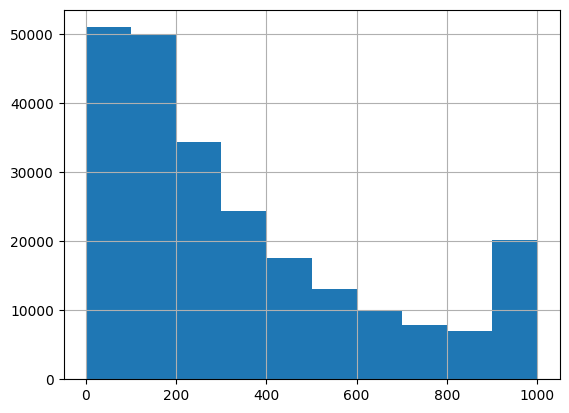

In [13]:
#Number of characters present in each sentence
data1['comment_text'].str.len().hist();

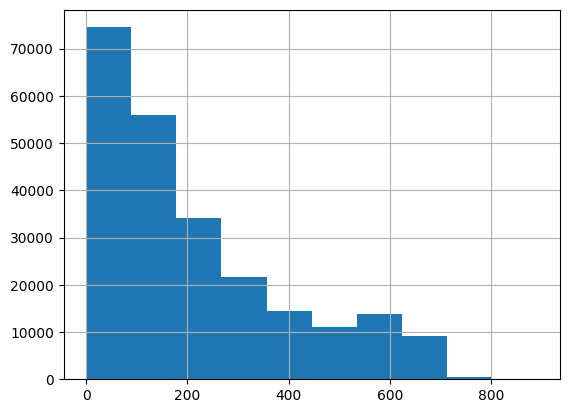

In [14]:

data1['comment_text_processed'].str.len().hist();

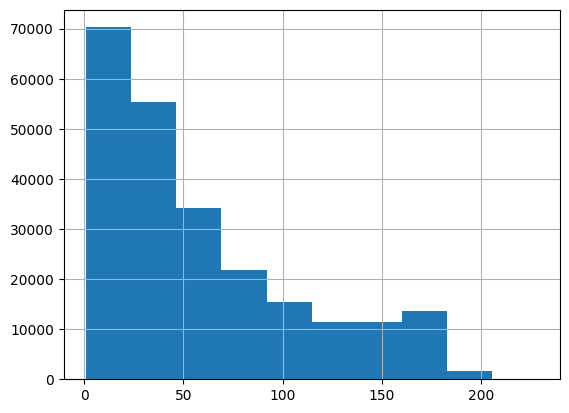

In [15]:
#Number of words appearing in each description
data1['comment_text'].str.split().map(lambda x: len(x)).hist();

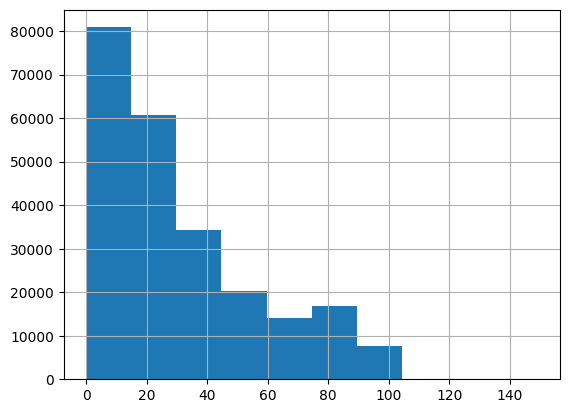

In [16]:
#Number of words appearing in each description
data1['comment_text_processed'].str.split().map(lambda x: len(x)).hist();

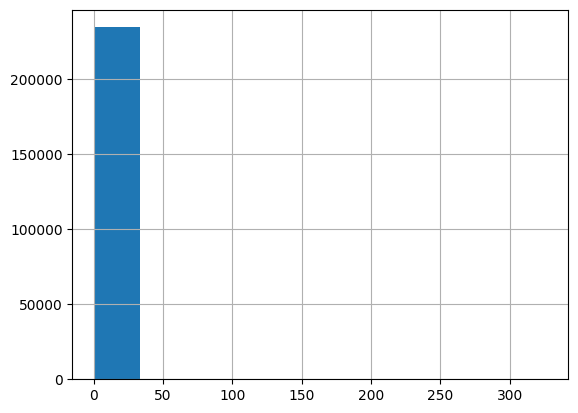

In [17]:
#Average word length
import numpy as np
data1['comment_text'].str.split().apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist();

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


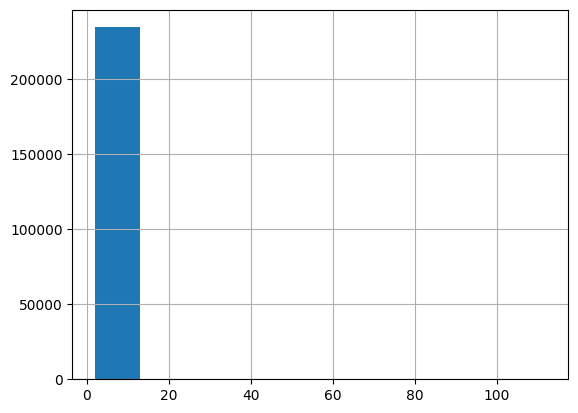

In [18]:
data1['comment_text_processed'].str.split().apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist();

In [19]:
#N-gram analysis
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams= get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

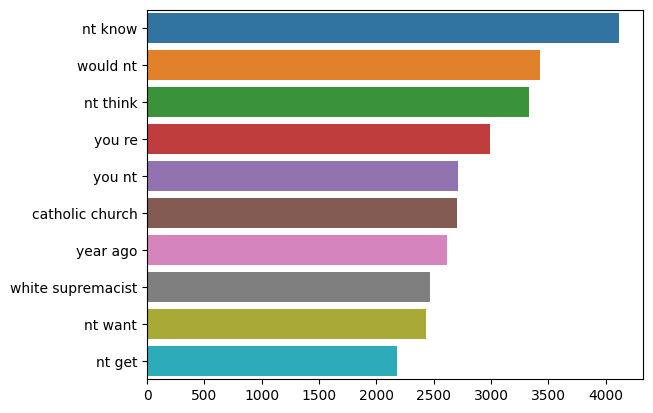

In [20]:
#Bigram analysis
plot_top_ngrams_barchart(data1['comment_text_processed'],2)

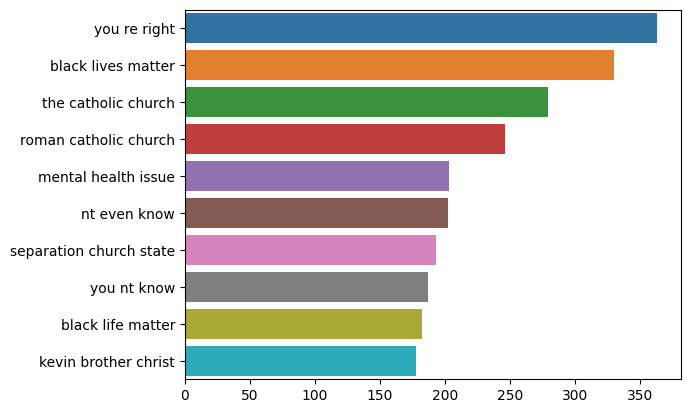

In [21]:
#Trigram analysis
plot_top_ngrams_barchart(data1['comment_text_processed'],3)

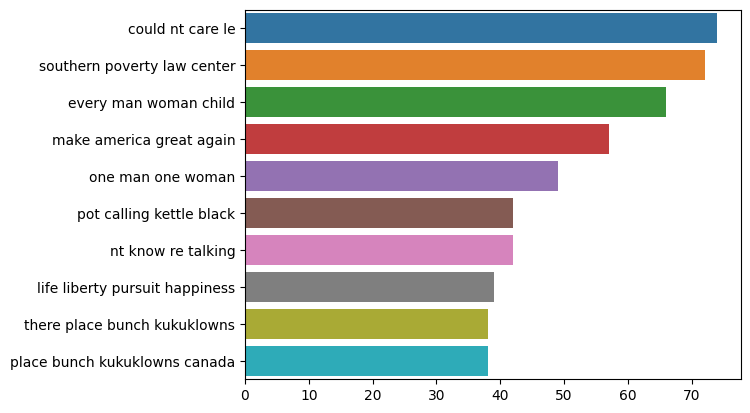

In [22]:
#For n=4
plot_top_ngrams_barchart(data1['comment_text_processed'],4)

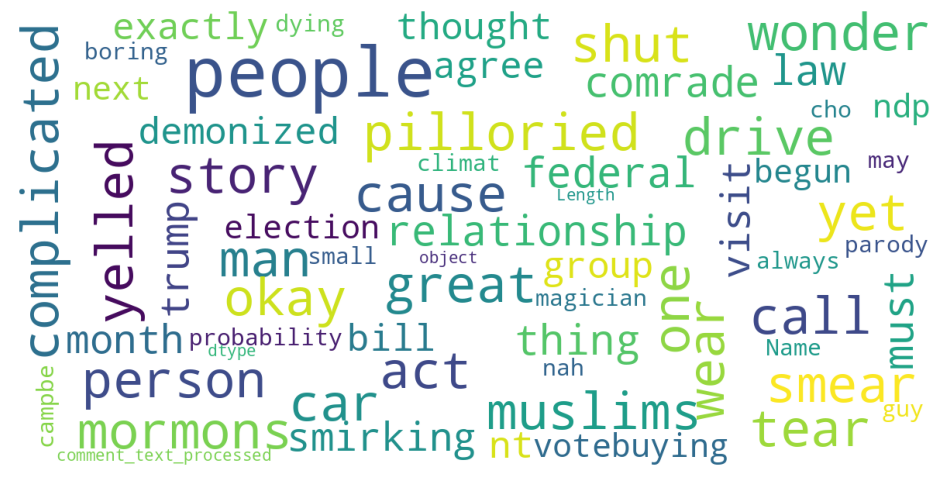

In [23]:
#Wordcloud
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
desc = data1['comment_text_processed']
wordcloud=wordcloud.generate(str(desc))

fig = plt.figure(1, figsize=(12, 12)) 
plt.axis('off')
 
plt.imshow(wordcloud)
plt.show()